## K-Means

##### We implement K-Means clustering for customer segmentation

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#### Load Dataset

In [5]:
df = pd.read_csv('/Users/hpourmand/Desktop/Retail/EngineeredDataset.csv')

#### Select features for clustering

In [6]:
features = df[['Recency', 'Frequency', 'Monetary']]

#### Standardize the features

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### Determine the optimal number of clusters using the Elbow method

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

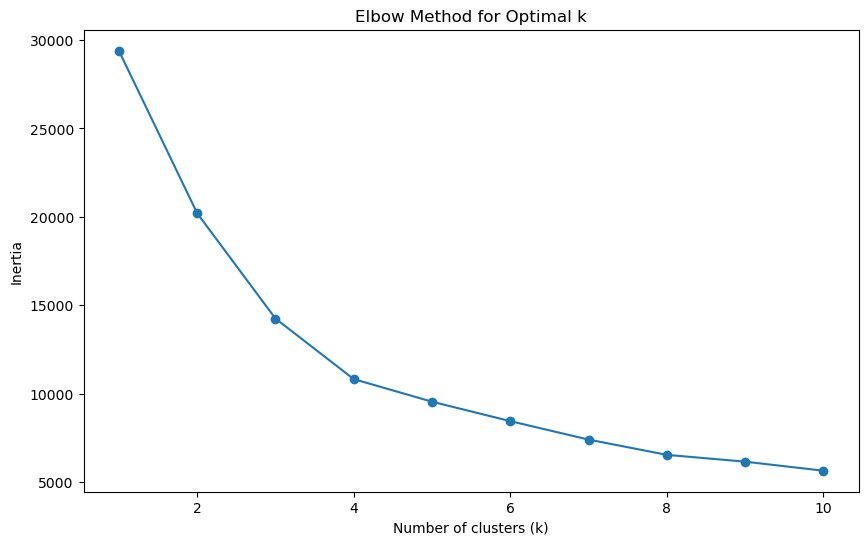

In [10]:
inertia = []
K = range(1, 11)  # Testing 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(False)
plt.show()

#### Fit K-Means with the chosen number of clusters

In [12]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster']

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       2
1       2
2       0
3       0
4       0
       ..
9795    1
9796    2
9797    2
9798    2
9799    2
Name: Cluster, Length: 9800, dtype: int32

#### Analyze the clusters

In [13]:
cluster_summary = df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['Cluster', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Customer Count']

print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
    Cluster  Avg Recency  Avg Frequency  Avg Monetary  Customer Count
0        0    80.976906       5.473554   2173.053012            4027
1        1    66.657930       9.272533   3686.493825            3739
2        2   500.313448       4.763397   2176.848873             989
3        3   111.655502       9.132057   9744.856420            1045


#### Visualize the clusters

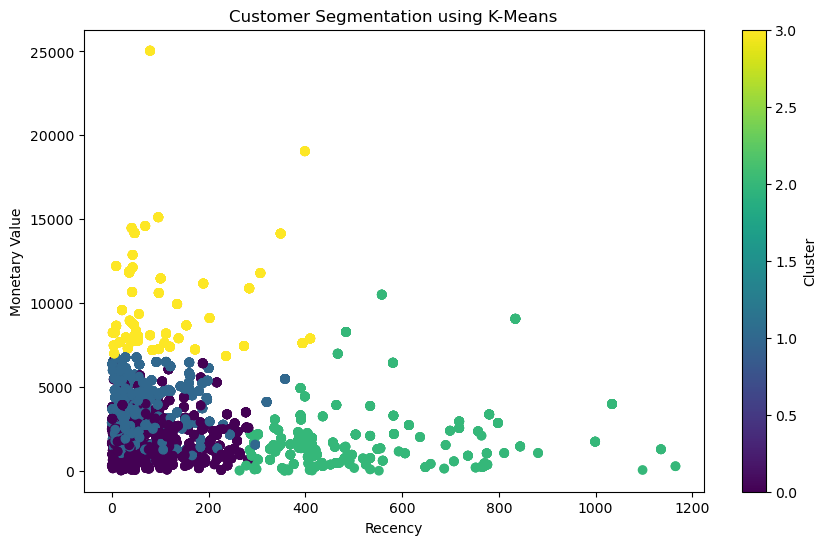

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Recency'], df['Monetary'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.colorbar(label='Cluster')
plt.grid(False)
plt.show()